# Classificação de imagens do Fashion-MNIST com Pytorch

Vamos utilizar um dataset muito famoso chamado Fashion-MNIST. A idéia é prever qual classe uma determinada imagem pertence, dentre os 10 tipos de roupas do dataset.

[link para aula](https://www.youtube.com/watch?v=hOnrwaOWSdE)


executar a instalação das bibliotecas abaixo:
```
pip install torch
pip install torchvision
pip install  matplotlib

```



|Label|Description|
|----|----|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

1) Importa dados e os visualiza
1) Normaliza e transoforma os dados em tensores
1) Criação do modelo
1) Treinar modelo e definir Loss e otimizador
1) Salvar o modelo
1) Testar o modelo

In [14]:
# importando as bibliotecas

import numpy as np
import matplotlib as plt

from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.optim as optim
# import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader


- **torch.optim**
    - conta com alguns algoritmos de otimização como SGD(gradiente descendente estocastica) e Adam (gradiente descentente adaptativo).
- **torcg.nn.functional**
    - Funções de ativação não lineares (relu, softmax, logsigmoid, ...)
    - Arqitetura de modelos
- **torchvision**
    - conjunto de dados

# Importando os dados


In [15]:
from torchvision import datasets, transforms

# Define as transformações que serão aplicadas nos dados - transforma os dados em tensores e os normaliza
# média e desvio padrão são tuplas

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ),(0.5, ))])

In [16]:
# Download dados de treino e teste
import torch.utils
import torch.utils.data


trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)

# Criar o loader dos dados
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [17]:
print("train data: ", len(train_loader.sampler))
print("test data: ", len(test_loader.sampler))

train data:  60000
test data:  10000


In [18]:
# Examinar os dados
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


- **transform.Compose**
    - cria as series de transformações que serão aplicadas aos dados
- **transform.Normalize**
    - normaliza a imagem com um determinada média e desvio padrão
- **torch.utils.data.Dataloader**
    - faz o load dos nossos dados de teste de treino com os parametros de batch_size definidos e shuffle para embaralhar os dados


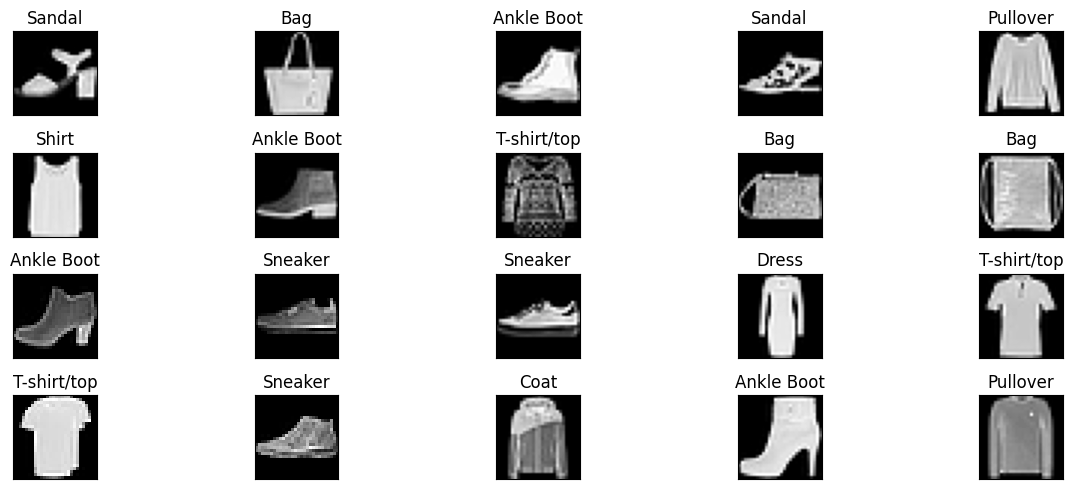

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,5))
rows = 4
columns = 5

fashion_classes = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot'}

for idx in np.arange(20):
    ax = fig.add_subplot(rows, columns, idx+1, xticks = [], yticks = [])
    ax.imshow(images[idx].numpy().squeeze(), cmap='gray')
    ax.set_title(fashion_classes[labels[idx].item()])
    fig.tight_layout()


# O modelo

imput layer         --> hidden layer   --> hidden layer   --> hidden layer   output layer
784 (neuronios)             256                 128                 64              10

a imagem tem 28px  por 28px  = 784 pixels

![cover](images/flatten.png)

![image.png](images/matriz.png)

a matriz de pixels é transformada em um vetor de 784 (28X28) posições para então servir de input para a rede neural.

finalizaremos com 10, pois é o numero de diferentes classes 

ao final da avaliação, faremos uma distribuição de probabilidade utilizando a função softmax

![funcao](images/funcao_softmax.png)

- **nn.Module**
    - constroi as redes neurais
    
- **super().init()**
    - cria uma nossa arquiteturaq com metodos e atributos da classe nn.Module
- 784 entradas e 256 saídas para a primeira camada oculta e o atribui a self.fc1
- 256 entradas e 128 saídas 
- 128 entradas e 64 saídas
- Forward
    - Tensor X como o input e muda o shape para considerar o batch
    - imagens passam pela rede
    - dados passam pela função Log Softmax para obter as probabilidades de log na rede neural

11 minutos e 32s
https://www.youtube.com/watch?v=hOnrwaOWSdE


https://www.youtube.com/results?search_query=rede+neural+convolucional+python+
https://www.youtube.com/watch?v=HV9cB6UKLIs&list=PLAHmHkSA6KkX7yrpL1GA-joyog9Z16N6V

importantissimo
https://www.youtube.com/watch?v=zAfBy74c2AI
https://www.youtube.com/watch?v=m33QC_lArio
https://www.youtube.com/@Stack_tecnologias/search?query=deep%20learning